In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc
import pickle

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import matplotlib.gridspec as gridspec




%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [37]:
mouse = '4139224.3'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

MouseName  DateFolder  SessionNumber               Track  RewardCount  \
805  4139224.3  18_10_2018              1  TwoTower_noTimeout           61   
807  4139224.3  18_10_2018              3  TwoTower_noTimeout           41   
841  4139224.3  20_10_2018              2  TwoTower_noTimeout           60   
879  4139224.3  23_10_2018              1    TwoTower_Timeout           48   
909  4139224.3  25_10_2018              1    TwoTower_Timeout           69   
933  4139224.3  26_10_2018              3    TwoTower_Timeout           72   
949  4139224.3  27_10_2018              4    TwoTower_Timeout           67   
959  4139224.3  29_10_2018              1    TwoTower_Timeout           71   
970  4139224.3  30_10_2018              1    TwoTower_Timeout           78   
983  4139224.3  31_10_2018              2    TwoTower_Timeout           66   
993  4139224.3  02_11_2018              1    TwoTower_Timeout           64   

     Imaging ImagingRegion   DateTime  \
805        1           CA1 2018-10-18   
807        1           CA1 2018-10-18   
841        1           CA1 2018-10-20   
879        1           CA1 2018-10-23   
909        1               2018-10-25   
933        1           CA1 2018-10-26   
949        1           CA1 2018-10-27   
959        1           CA1 2018-10-29   
970        1           CA1 2018-10-30   
983        1           CA1 2018-10-31   
993        1           CA1 2018-11-02   

                                             data file  \
805  G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...   
807  G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...   
841  G:\My Drive\VR_Data\TwoTower\4139224.3\20_10_2...   
879  G:\My Drive\VR_Data\TwoTower\4139224.3\23_10_2...   
909  G:\My Drive\VR_Data\TwoTower\4139224.3\25_10_2...   
933  G:\My Drive\VR_Data\TwoTower\4139224.3\26_10_2...   
949  G:\My Drive\VR_Data\TwoTower\4139224.3\27_10_2...   
959  G:\My Drive\VR_Data\TwoTower\4139224.3\29_10_2...   
970  G:\My Drive\VR_Data\TwoTower\4139224.3\30_10_2...   
983  G:\My Drive\VR_Data\TwoTower\4139224.3\31_10_2...   
993  G:\My Drive\VR_Data\TwoTower\4139224.3\02_11_2...   

                                              scanfile  \
805  G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...   
807  G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...   
841  G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...   
879  G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...   
909  G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...   
933  G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...   
949  G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...   
959  G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...   
970  G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...   
983  G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...   
993  G:\My Drive\2P_Data\TwoTower\4139224.3\02_11_2...   

                                               scanmat  \
805  G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...   
807  G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...   
841  G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...   
879  G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...   
909  G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...   
933  G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...   
949  G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...   
959  G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...   
970  G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...   
983  G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...   
993  G:\My Drive\2P_Data\TwoTower\4139224.3\02_11_2...   

                                             s2pfolder  
805  G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...  
807  G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...  
841  G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...  
879  G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...  
909  G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...  
933  G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...  
949  G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...  
959  G:\My Drive\2P_Data\Two

In [38]:
sess = df_mouse.iloc[-3]

In [39]:
VRDat,C, S, A = pp.load_scan_sess(sess)

num aberrant ttls 0.0
32188 (32188,) (32188, 20) 101194


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [40]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']
effMorph = (effMorph+.2)/1.4

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:324: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [41]:
S_trial_mat[np.isnan(S_trial_mat)]=0
S_trial_mat = sp.ndimage.filters.gaussian_filter1d(S_trial_mat,1,axis=1)
S_tmat = np.reshape(S_trial_mat,[S_trial_mat.shape[0],-1])
S_tmat = S_tmat/np.linalg.norm(S_tmat,ord=2,axis=-1)[:,np.newaxis]
S_t_rmat = np.matmul(S_tmat,S_tmat.T)

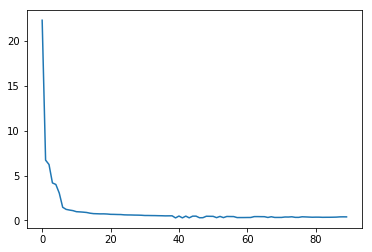

In [42]:
w,V = np.linalg.eig(S_t_rmat)
f,ax = plt.subplots()
ax.plot(w)

In [43]:
msort = np.argsort(effMorph)

In [44]:
C_msort = sm._sort_simmat(S_t_rmat,msort)

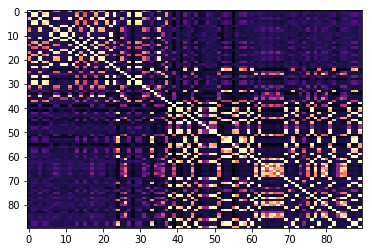

In [45]:
f,ax = plt.subplots()
ax.imshow(C_msort,aspect='auto',cmap='magma',vmax = np.percentile(C_msort,95))

In [46]:
labels = sm.cluster_simmat(S_t_rmat)
nc = np.unique(labels).shape[0]
clustmean = np.array([effMorph[labels==i].mean() for i in range(nc)])
clusterOrder = np.argsort(clustmean)
llabels = np.zeros(effMorph.shape)

for i,cl in enumerate(clusterOrder.tolist()):
    llabels[labels==cl]=i
#print(clusterOrder)

clustsort = sm._sort_clusters(sm.cluster_simmat(S_t_rmat),effMorph)
C_csort = sm._sort_simmat(S_t_rmat,clustsort)
print(nc)

14.346742682928582
20.91376242494898
24.10660025410657
27.027646116518294
30.39522791509375
29.00685764440023
28.128207086147217
29.28784587448347
14.346742682928582
20.91376242494898
24.10660025410657
27.00208293973827
30.39522791509375
29.00685764440023
28.128207086147217
28.940712571011794
6


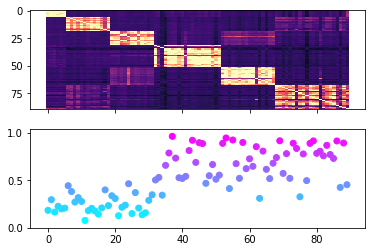

In [47]:
f,ax = plt.subplots(2,1,sharex=True)
ax[0].imshow(C_csort,aspect='auto',cmap='magma',vmax = np.percentile(C_msort,95),vmin=0.1)
ax[1].scatter(np.arange(effMorph.shape[0]),effMorph[clustsort],c=effMorph[clustsort],cmap='cool')

In [48]:
# print(labels)
prelabels,postlabels,postreward = llabels[0:-1],llabels[1:],trial_info['rewards'][1:]
transmat = np.zeros([int(np.amax(llabels)+1),int(np.amax(llabels)+1)])

premorph,postmorph = trial_info['morphs'][0:-1],trial_info['morphs'][1:]#effMorph[1:]
for i in range(int(np.amax(llabels)+1)):
    mask = prelabels ==i
    
    transmat[i,:],edges = np.histogram(postlabels[mask],bins=np.arange(0,np.amax(llabels)+2))
    transmat[i,:]/=transmat[i,:].sum()
    print("node ", i)
    print("next node", postlabels[mask])
    
    print("last morph", premorph[mask])
    print("morph", postmorph[mask])
    print("reward", postreward[mask])
    print(transmat[i,:])
    

node  0
next node [0. 3. 3. 3. 3. 3.]
last morph [0. 0. 0. 0. 0. 0.]
morph [0.   0.75 0.5  1.   1.   0.75]
reward [1. 1. 1. 1. 1. 1.]
[0.16666667 0.         0.         0.83333333 0.         0.        ]
node  1
next node [1. 5. 1. 5. 5. 5. 5. 1. 1. 1. 5. 5. 5.]
last morph [0.25 0.   0.   0.   0.25 0.   0.   0.25 0.25 0.   0.   0.   0.  ]
morph [0.   0.5  0.   1.   1.   0.75 0.75 0.25 0.   0.   0.25 0.25 1.  ]
reward [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.]
[0.         0.38461538 0.         0.         0.         0.61538462]
node  2
next node [4. 2. 5. 2. 1. 4. 4. 4. 5. 4. 4. 2. 4.]
last morph [0.   0.25 0.   0.   0.   0.   0.25 0.25 0.   0.   0.25 0.   0.25]
morph [1.   0.   1.   0.   0.   0.25 0.75 0.5  0.25 0.25 0.75 0.25 1.  ]
reward [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
[0.         0.07692308 0.23076923 0.         0.53846154 0.15384615]
node  3
next node [2. 4. 2. 2. 2. 4. 5. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4. 2.]
last morph [0.25 0.75 0.75 0.5  1.   0.5  0.5  0.5  1.   1.   0.5 

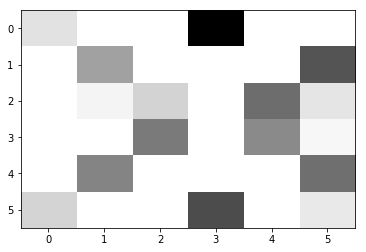

In [49]:
f,ax = plt.subplots()
# transmat = transmat[clusterOrder,:]
# transmat = transmat[:,clusterOrder]
ax.imshow(transmat,aspect='auto',cmap='Greys')

In [50]:
print(llabels)

[3. 2. 4. 1. 1. 5. 3. 4. 5. 0. 0. 3. 2. 2. 5. 3. 2. 2. 1. 1. 5. 3. 2. 4.
 5. 3. 4. 1. 5. 3. 5. 5. 0. 3. 2. 4. 1. 5. 3. 2. 4. 5. 5. 0. 3. 2. 5. 5.
 3. 2. 4. 5. 3. 2. 4. 5. 3. 4. 1. 5. 3. 4. 1. 1. 1. 1. 5. 0. 3. 4. 1. 5.
 3. 4. 1. 5. 3. 4. 5. 0. 3. 4. 5. 3. 4. 5. 3. 2. 2. 4.]


In [51]:
S_clust_mat = np.zeros([int(np.amax(llabels)+1),S_trial_mat.shape[1],S_trial_mat.shape[2]])
for l in np.unique(llabels).tolist():
    S_clust_mat[int(l),:,:] = np.squeeze(np.nanmean(S_trial_mat[llabels==l,:,:],axis=0))

In [52]:
print(S_clust_mat.shape)

(6, 90, 2008)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


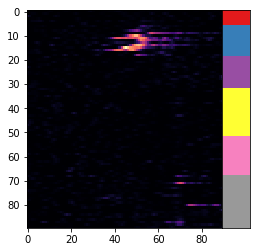

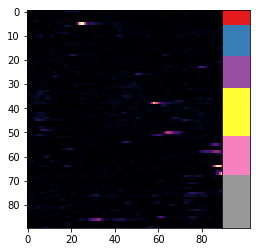

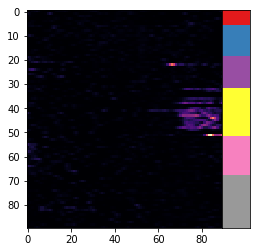

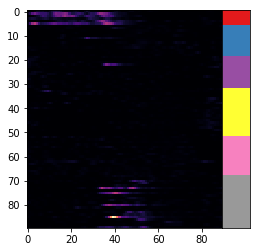

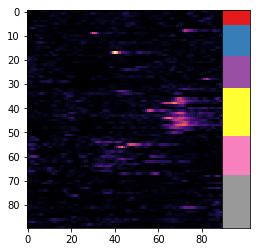

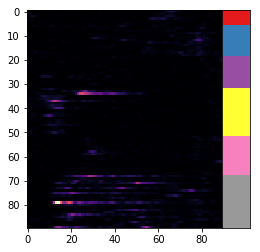

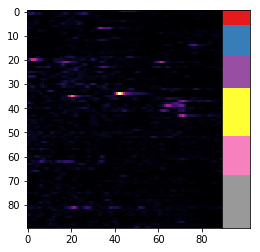

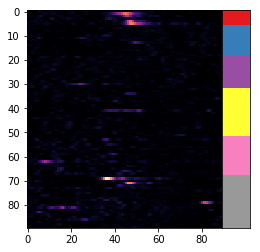

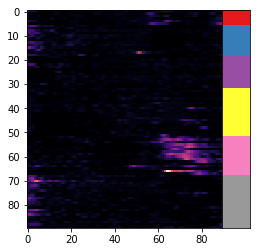

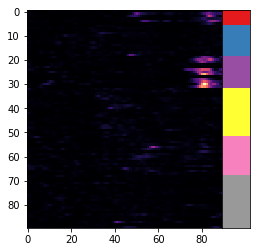

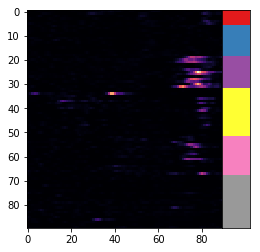

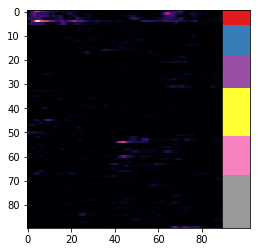

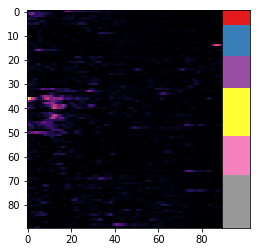

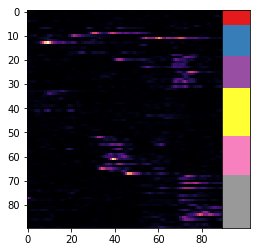

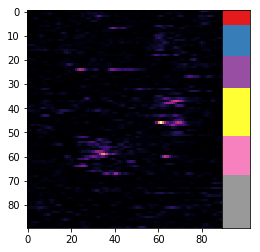

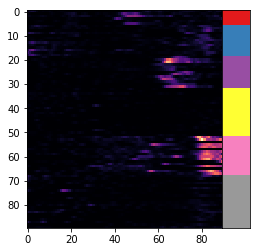

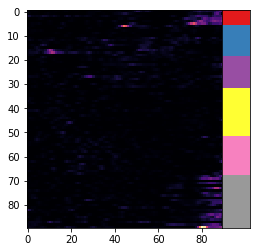

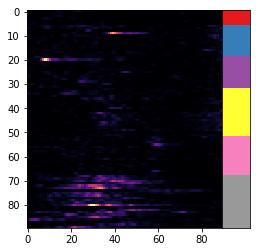

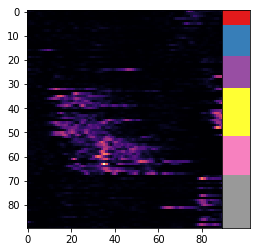

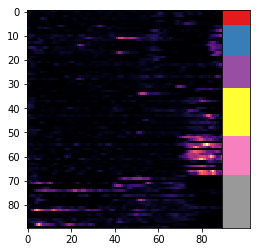

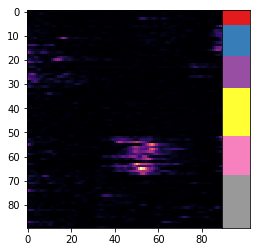

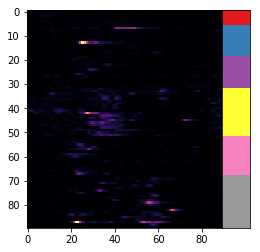

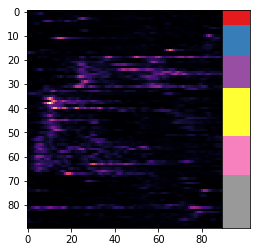

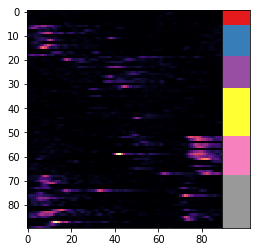

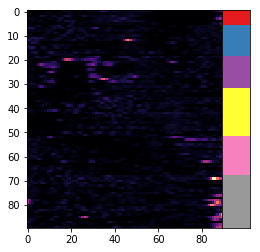

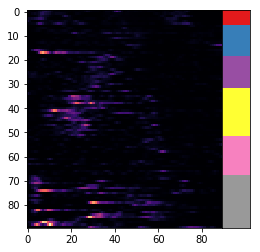

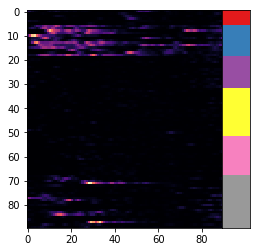

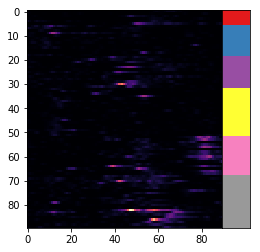

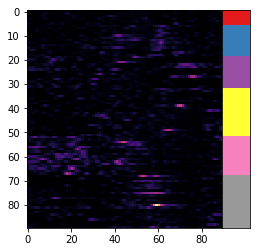

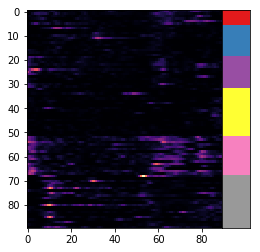

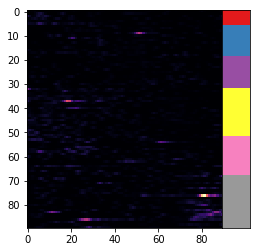

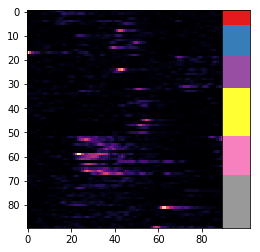

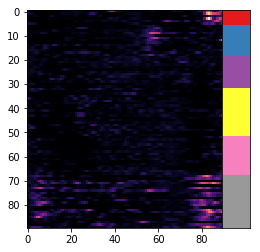

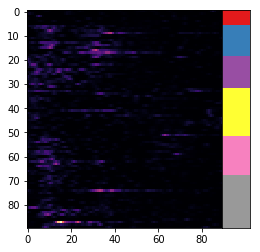

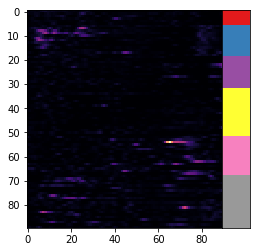

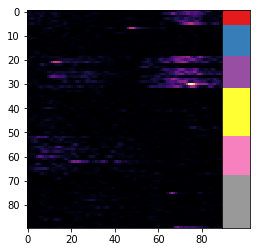

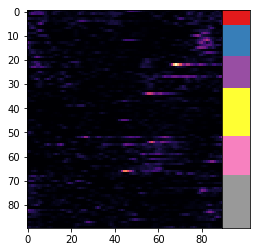

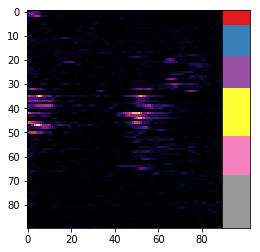

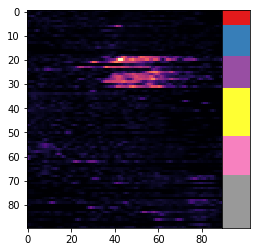

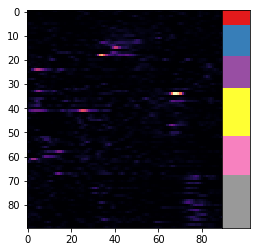

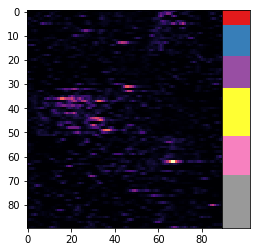

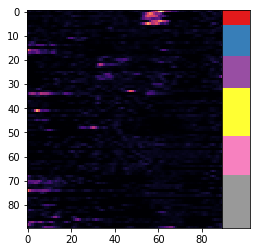

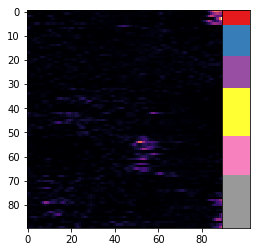

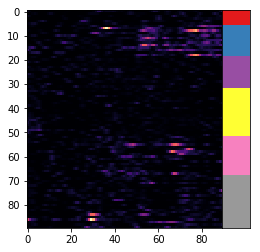

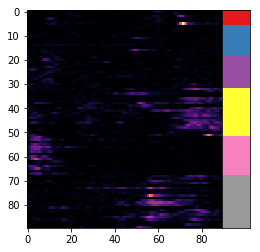

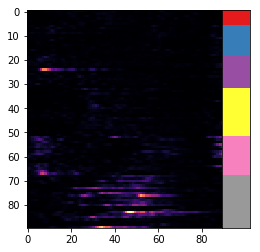

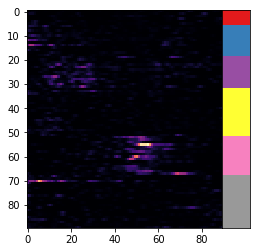

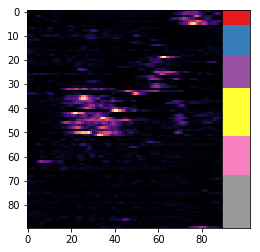

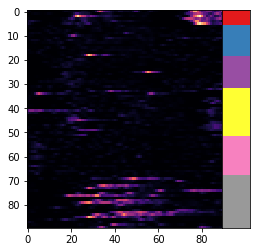

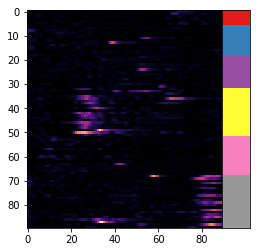

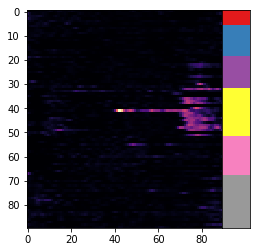

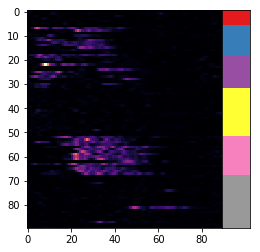

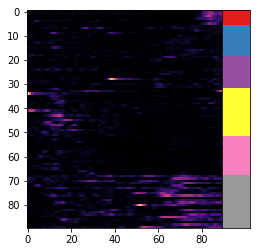

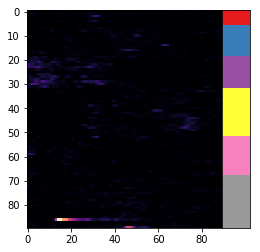

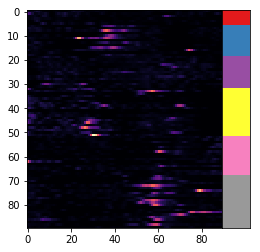

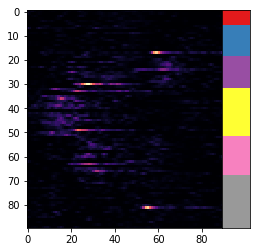

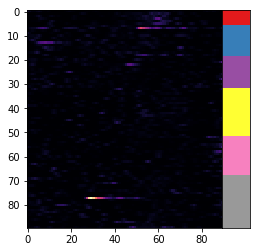

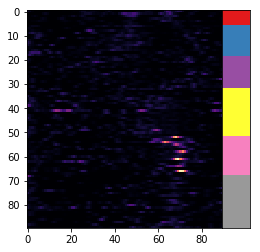

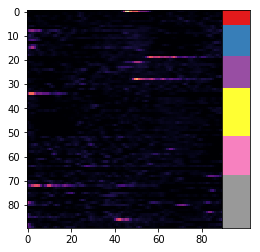

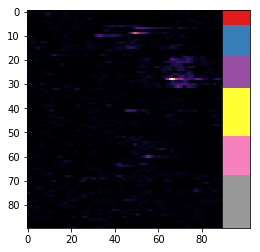

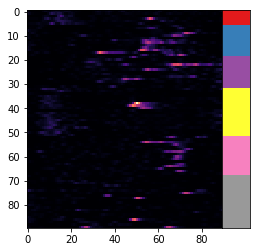

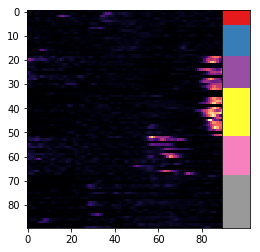

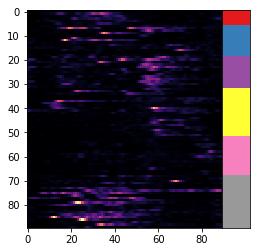

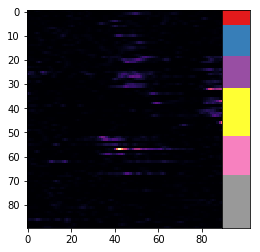

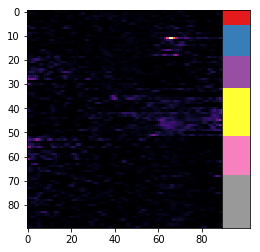

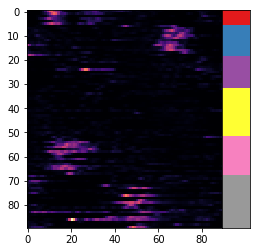

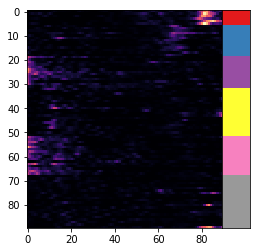

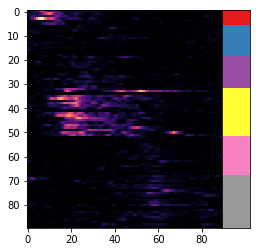

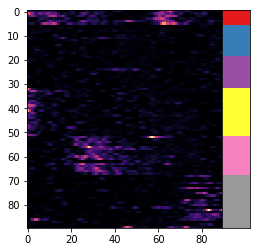

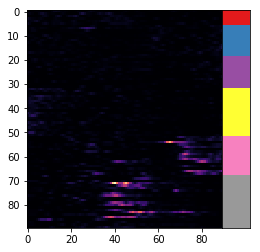

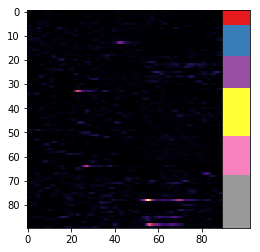

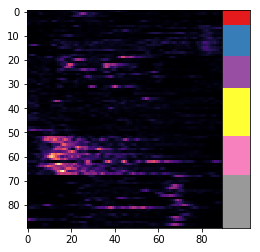

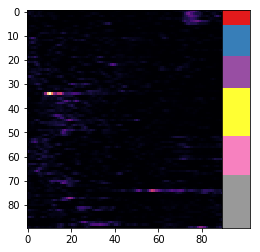

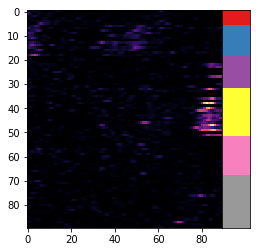

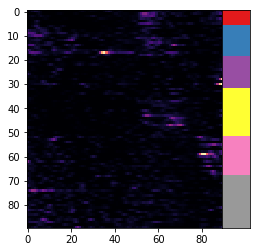

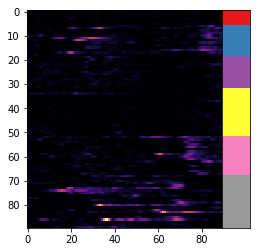

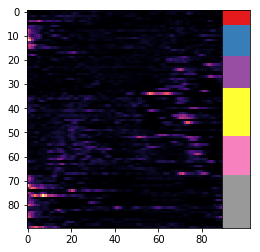

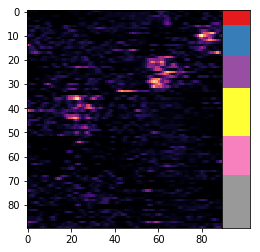

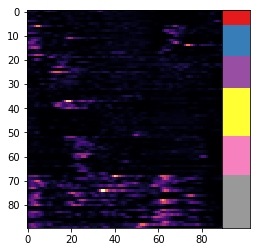

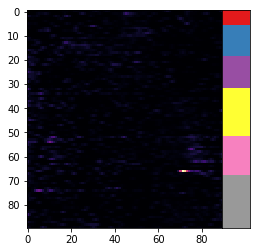

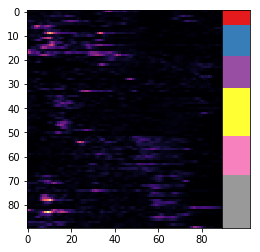

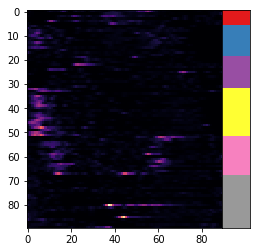

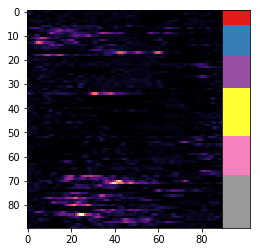

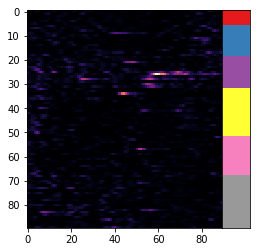

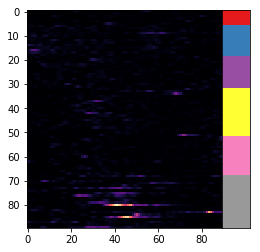

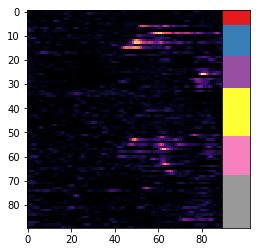

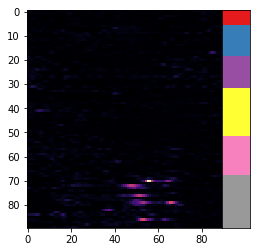

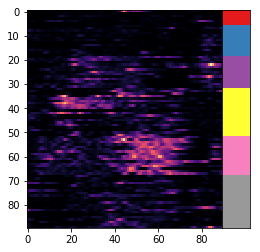

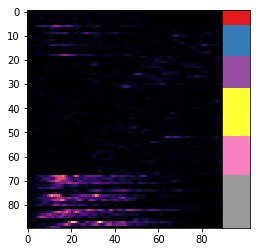

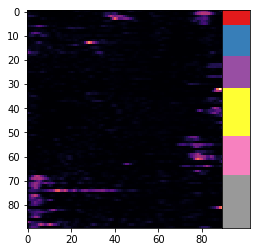

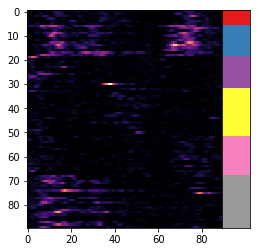

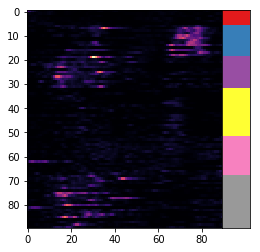

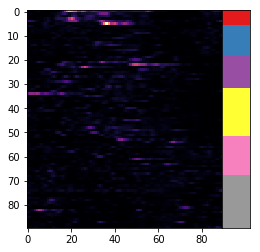

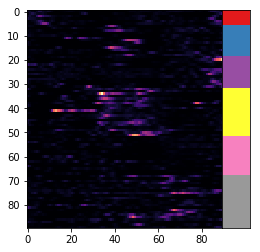

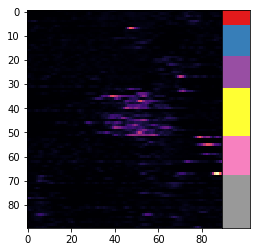

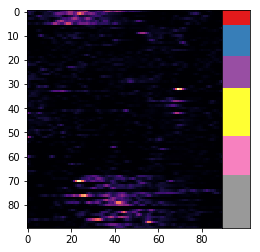

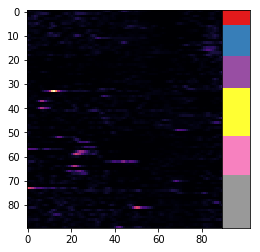

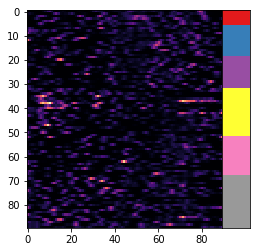

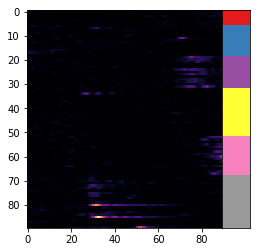

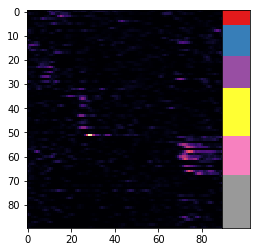

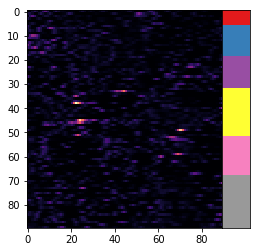

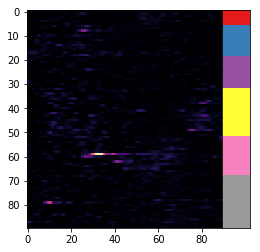

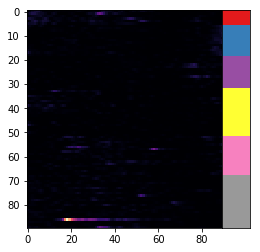

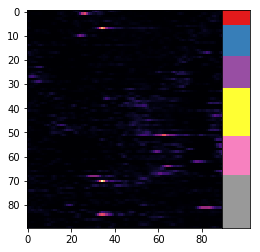

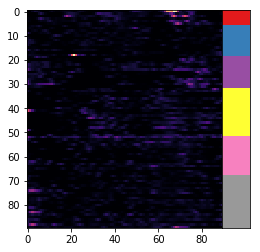

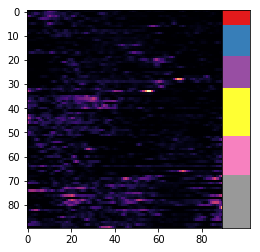

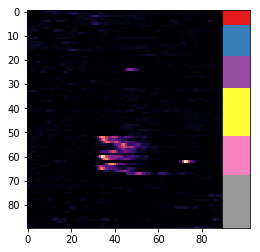

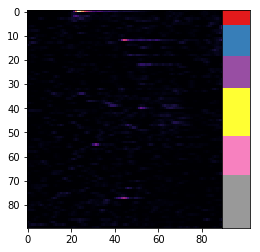

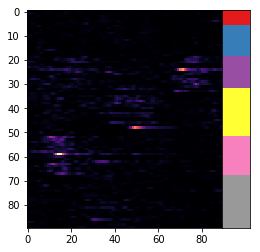

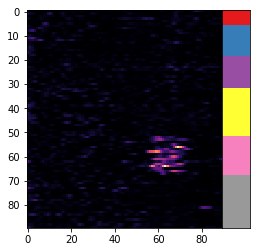

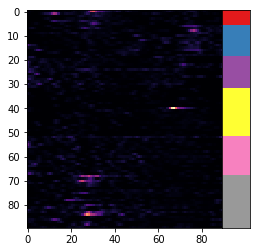

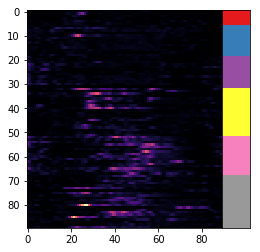

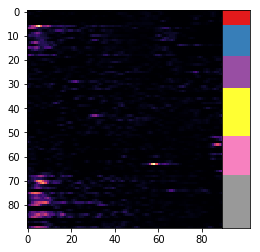

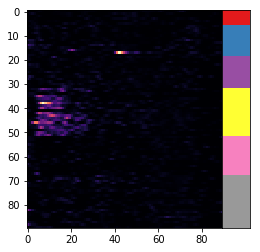

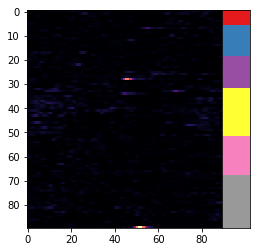

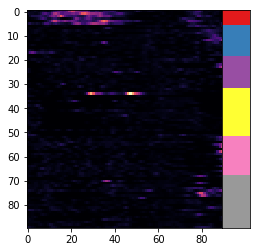

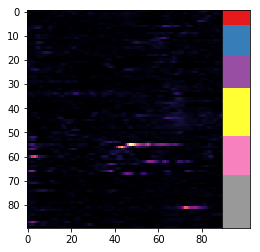

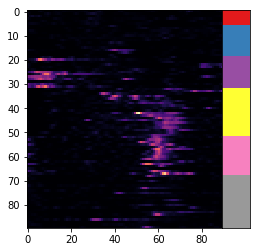

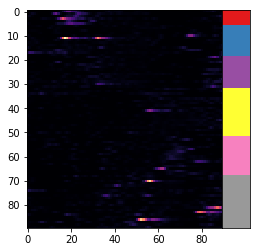

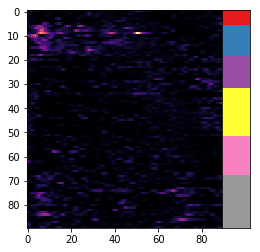

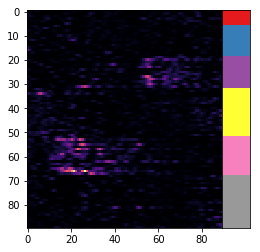

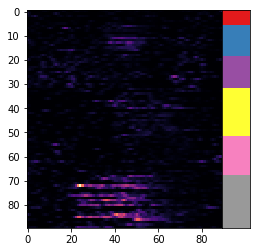

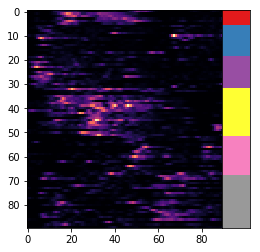

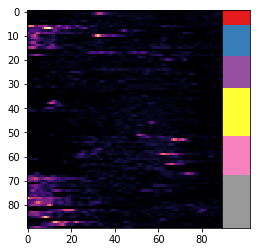

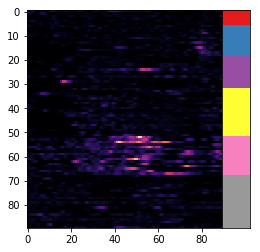

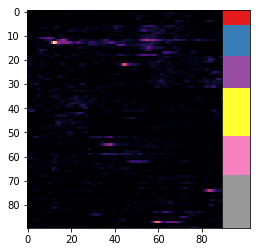

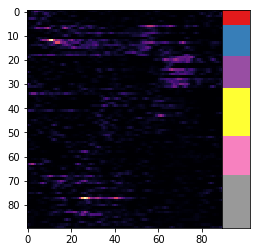

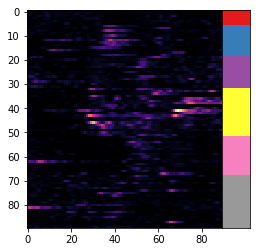

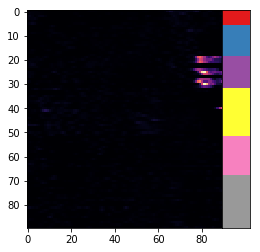

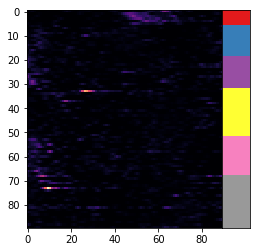

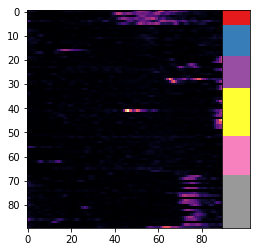

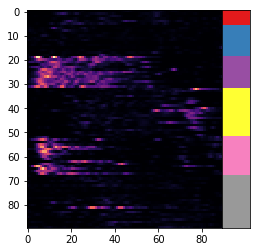

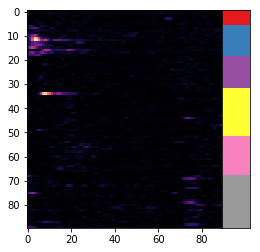

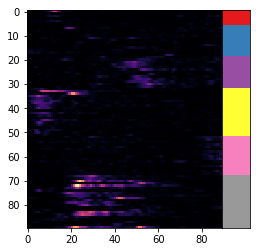

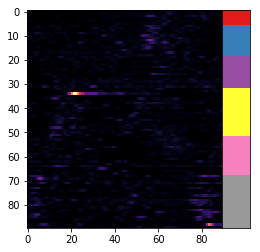

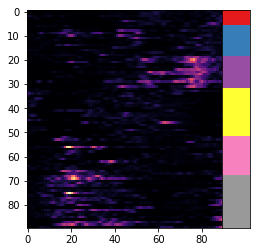

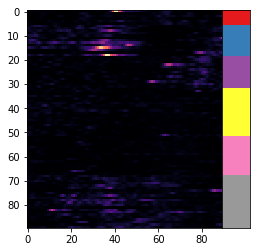

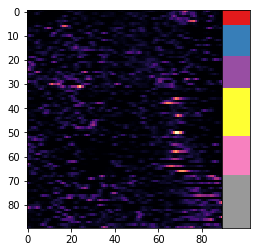

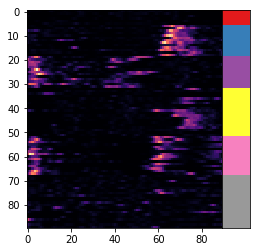

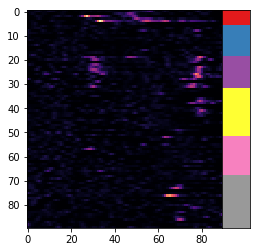

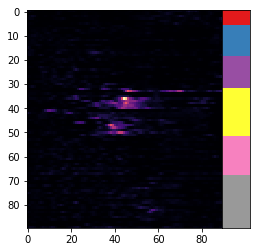

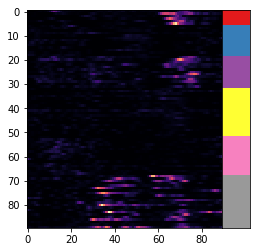

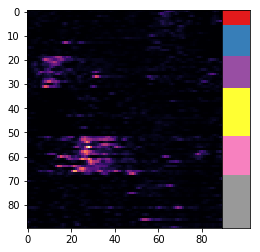

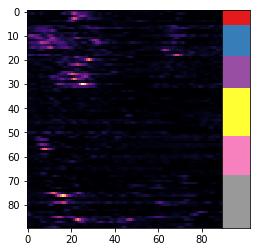

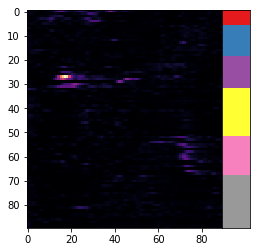

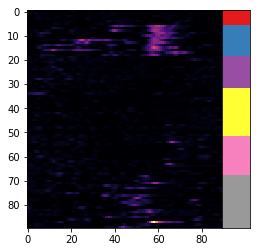

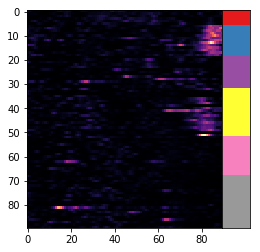

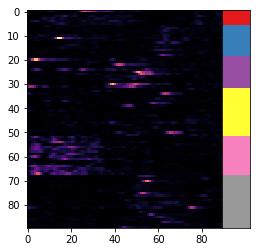

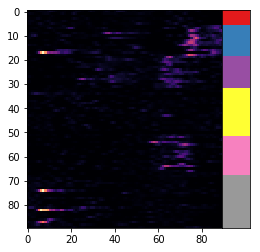

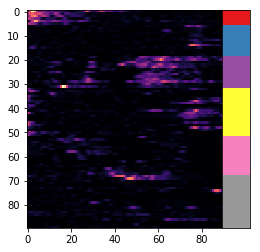

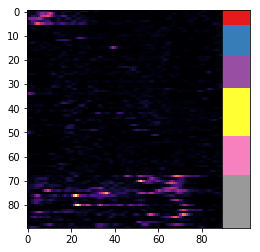

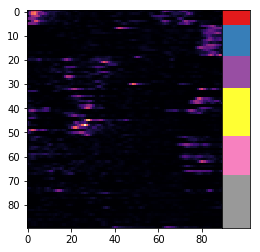

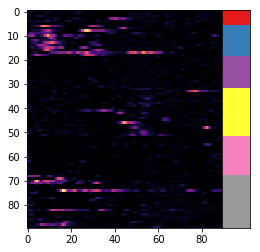

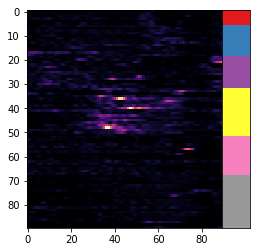

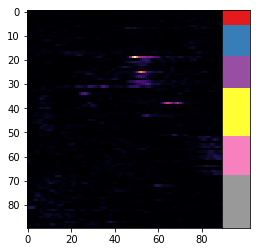

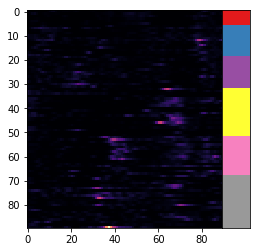

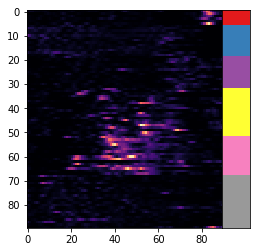

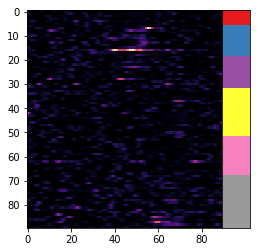

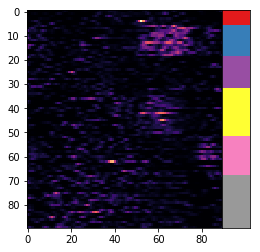

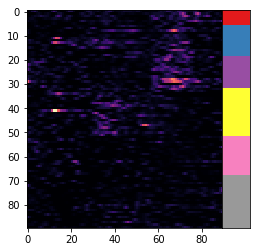

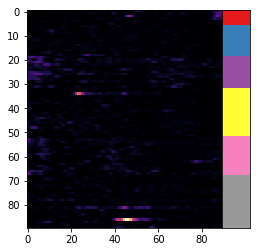

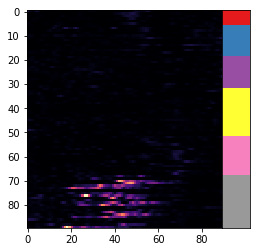

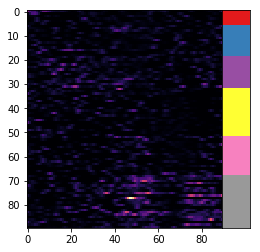

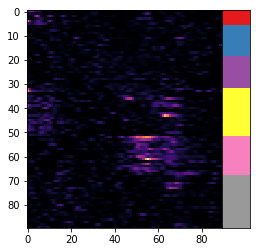

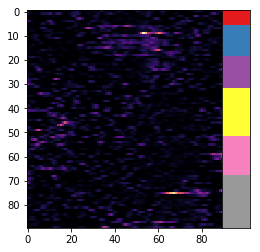

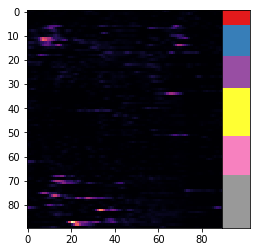

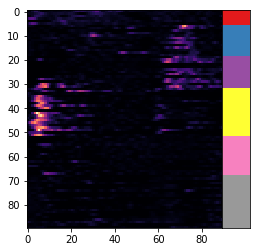

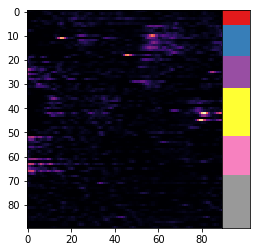

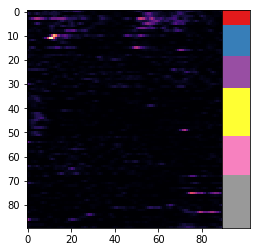

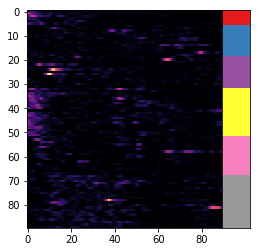

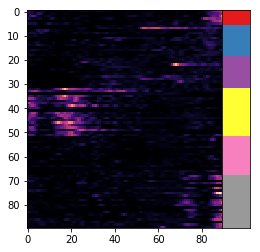

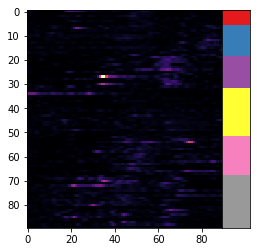

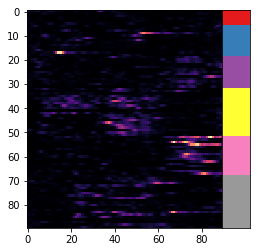

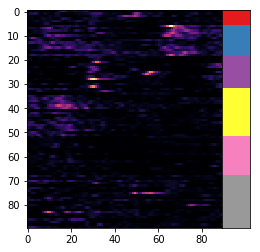

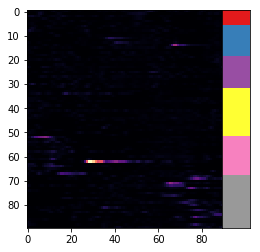

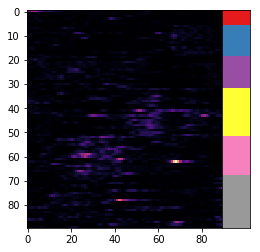

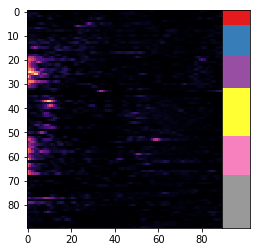

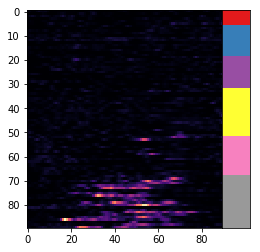

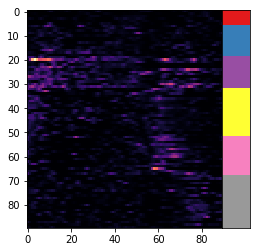

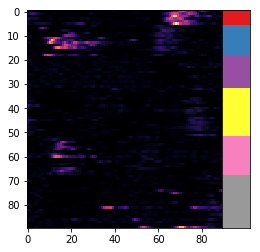

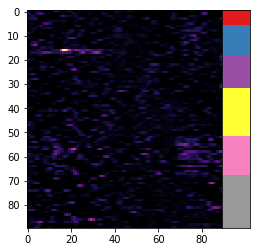

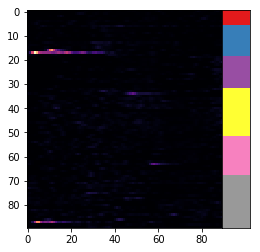

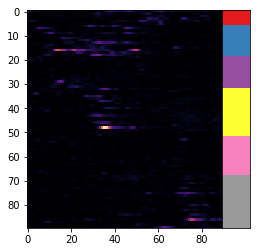

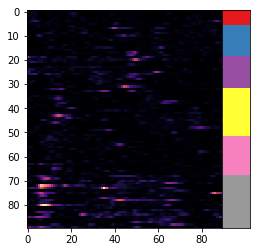

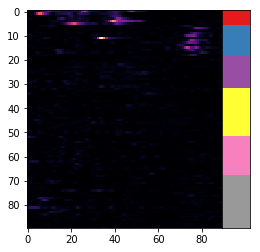

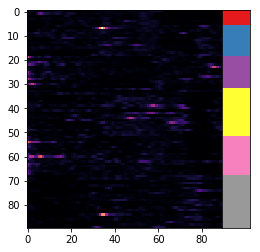

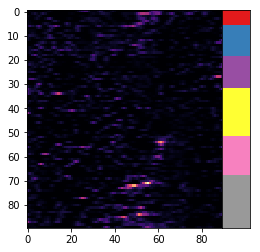

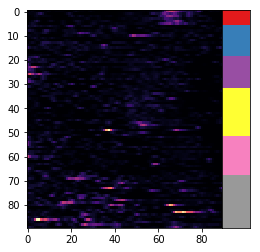

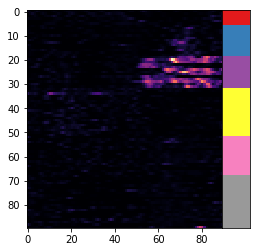

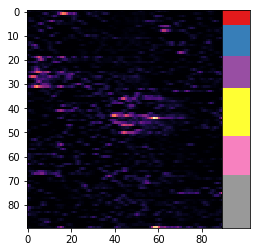

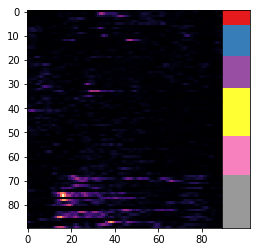

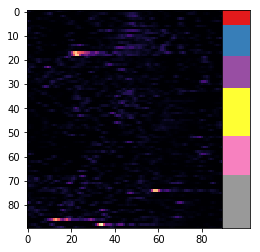

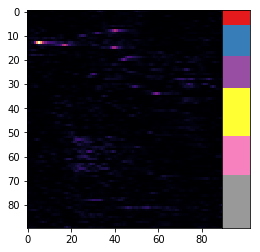

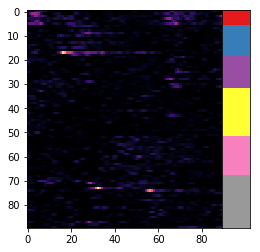

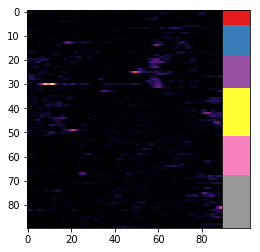

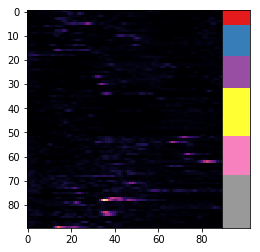

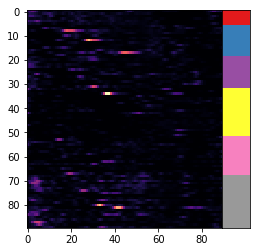

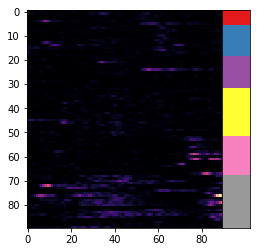

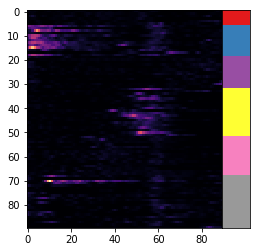

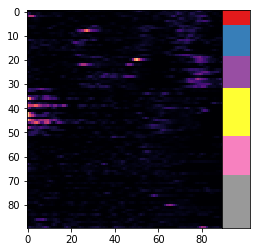

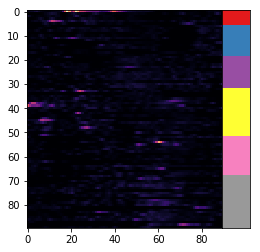

In [53]:
S_clust_sort = S_trial_mat[np.argsort(llabels),:,:]
for c in range(0,S_trial_mat.shape[-1],10):
    gs = gridspec.GridSpec(1,8)
    gs.update(wspace=.0)
    f = plt.figure(figsize=[4,4])
    ax = f.add_subplot(gs[:,:-1])
#     f,ax = plt.subplots(1,2,sharey=True)
    ax.imshow(S_clust_sort[:,:,c]/np.nanmean(S_clust_sort[:,:,c].ravel()),cmap='magma',aspect='auto')
    ax = f.add_subplot(gs[:,-1])
    llabels_p = llabels[:,np.newaxis]*np.ones([1,2])

    ax.imshow(llabels_p[np.argsort(llabels),:],aspect='auto',cmap='Set1')
#     ax.scatter(np.zeros(llabels.shape),np.arange(llabels.shape[0]),c=llabels[np.argsort(llabels)[::-1]],s=7,cmap='Set1')
#     ax.set_ylim([0,llabels.shape[0]])
#     ax.set_xlim([-.1,.1])
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax[1].scatter(np.zeros(llabels.shape),np.arange(llabels.shape[0]),c=llabels[np.argsort(llabels)],cmap='set1')